In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Tratamento dos dados

A cada valor X nos dados, será substituído pela moda da feature

In [3]:
eixo_1 = pd.read_excel("/content/drive/MyDrive/Pesquisas e Projetos/Projeto Comunidades - Análise de dados/[en]Comunidadev8.xlsx").filter(["P01", "P02", "P03", "P04", "P05", "P06", "P07", "P08", "P09","P10", "P11", "P12", "P13", "P14", "P15", "P16", "P17", "P18", "P19", "P20", "P21", "P22", "P23", "P24", "P25", "perfil"])
#eixo_1 = pd.read_excel("/content/drive/MyDrive/Pesquisas e Projetos/Projeto Comunidades - Análise de dados/Comunidadev8.xlsx").filter(["P01", "P04", "P09", "P10", "P11", "P13", "P15", "P17", "P23", "P25", "perfil"])
eixo_1 = eixo_1.loc[0:169].reset_index(drop=True)
eixo_1

P01 P02 P03 P04 P05 P06 P07 P08 P09 P10  ... P17 P18 P19 P20 P21 P22 P23  \
0     5   5   5   3   5   3   3   3   2   4  ...   2   2   2   2   5   5   3   
1     5   5   3   3   3   4   5   5   3   3  ...   2   2   4   3   3   3   3   
2     5   5   5   4   5   5   5   5   2   3  ...   3   5   5   4   3   5   5   
3     4   5   4   3   4   5   5   4   3   4  ...   1   2   2   3   5   4   3   
4     5   5   3   3   5   5   5   5   3   4  ...   1   1   3   3   5   5   3   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
165   5   5   5   3   5   5   5   5   5   5  ...   2   1   1   1   5   5   3   
166   5   5   5   5   5   5   5   5   2   3  ...   3   5   5   5   5   5   5   
167   5   5   5   4   5   5   5   5   2   5  ...   1   1   5   3   5   5   3   
168   5   5   5   5   5   5   4   5   3   5  ...   4   1   5   4   4   5   5   
169   5   5   5   5   5   5   5   5   2   5  ...   1   1   5   3   5   5   3   

    P24 P25      perfil  
0     3   3  quilombola  
1     3   3  quilombola  
2     3   3  quilombola  
3     3   4  quilombola  
4     3   3  quilombola  
..   ..  ..         ...  
165   3   3   fishermen  
166   3   5   fishermen  
167   3   5   fishermen  
168   3   5   fishermen  
169   5   5   fishermen  

[170 rows x 26 columns]

In [4]:
for col in eixo_1.columns:
  moda = eixo_1[col][eixo_1[col] != 'X'].mode()[0]
  eixo_1[col] = eixo_1[col].replace('X', moda)
eixo_1

/tmp/ipython-input-2397716675.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  eixo_1[col] = eixo_1[col].replace('X', moda)


P01  P02  P03  P04  P05  P06  P07  P08  P09  P10  ... P17 P18  P19  P20  \
0      5    5    5    3    5    3    3    3    2    4  ...   2   2    2    2   
1      5    5    3    3    3    4    5    5    3    3  ...   2   2    4    3   
2      5    5    5    4    5    5    5    5    2    3  ...   3   5    5    4   
3      4    5    4    3    4    5    5    4    3    4  ...   1   2    2    3   
4      5    5    3    3    5    5    5    5    3    4  ...   1   1    3    3   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ..  ..  ...  ...   
165    5    5    5    3    5    5    5    5    5    5  ...   2   1    1    1   
166    5    5    5    5    5    5    5    5    2    3  ...   3   5    5    5   
167    5    5    5    4    5    5    5    5    2    5  ...   1   1    5    3   
168    5    5    5    5    5    5    4    5    3    5  ...   4   1    5    4   
169    5    5    5    5    5    5    5    5    2    5  ...   1   1    5    3   

     P21  P22  P23  P24  P25      perfil  
0      5    5    3    3    3  quilombola  
1      3    3    3    3    3  quilombola  
2      3    5    5    3    3  quilombola  
3      5    4    3    3    4  quilombola  
4      5    5    3    3    3  quilombola  
..   ...  ...  ...  ...  ...         ...  
165    5    5    3    3    3   fishermen  
166    5    5    5    3    5   fishermen  
167    5    5    3    3    5   fishermen  
168    4    5    5    3    5   fishermen  
169    5    5    3    5    5   fishermen  

[170 rows x 26 columns]

### Extração de Características

In [ ]:
"""
eixo_1.replace('X', np.nan, inplace=True)
#eixo_1.replace('x', pd.NA, inplace=True)
eixo_1.dropna(inplace=True)
eixo_1 = eixo_1.reset_index()
eixo_1 = eixo_1.drop('index', axis=1)
eixo_1
"""

"\neixo_1.replace('X', np.nan, inplace=True)\n#eixo_1.replace('x', pd.NA, inplace=True)\neixo_1.dropna(inplace=True)\neixo_1 = eixo_1.reset_index()\neixo_1 = eixo_1.drop('index', axis=1)\neixo_1\n"

In [5]:
eixo_1['perfil'].unique()

array(['quilombola', 'indigenous', 'fishermen', 'urban',
       'extractivists/farmers'], dtype=object)

Padronizando tudo para float

In [6]:
eixo_1[["P01", "P02", "P03", "P04", "P05", "P06", "P07", "P08", "P09","P10", "P11", "P12", "P13", "P14", "P15", "P16", "P17", "P18", "P19", "P20", "P21", "P22", "P23", "P24", "P25"]] = eixo_1[["P01", "P02", "P03", "P04", "P05", "P06", "P07", "P08", "P09","P10", "P11", "P12", "P13", "P14", "P15", "P16", "P17", "P18", "P19", "P20", "P21", "P22", "P23", "P24", "P25"]].astype(float)

In [7]:
eixo_1

P01  P02  P03  P04  P05  P06  P07  P08  P09  P10  ...  P17  P18  P19  \
0    5.0  5.0  5.0  3.0  5.0  3.0  3.0  3.0  2.0  4.0  ...  2.0  2.0  2.0   
1    5.0  5.0  3.0  3.0  3.0  4.0  5.0  5.0  3.0  3.0  ...  2.0  2.0  4.0   
2    5.0  5.0  5.0  4.0  5.0  5.0  5.0  5.0  2.0  3.0  ...  3.0  5.0  5.0   
3    4.0  5.0  4.0  3.0  4.0  5.0  5.0  4.0  3.0  4.0  ...  1.0  2.0  2.0   
4    5.0  5.0  3.0  3.0  5.0  5.0  5.0  5.0  3.0  4.0  ...  1.0  1.0  3.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
165  5.0  5.0  5.0  3.0  5.0  5.0  5.0  5.0  5.0  5.0  ...  2.0  1.0  1.0   
166  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  2.0  3.0  ...  3.0  5.0  5.0   
167  5.0  5.0  5.0  4.0  5.0  5.0  5.0  5.0  2.0  5.0  ...  1.0  1.0  5.0   
168  5.0  5.0  5.0  5.0  5.0  5.0  4.0  5.0  3.0  5.0  ...  4.0  1.0  5.0   
169  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  2.0  5.0  ...  1.0  1.0  5.0   

     P20  P21  P22  P23  P24  P25      perfil  
0    2.0  5.0  5.0  3.0  3.0  3.0  quilombola  
1    3.0  3.0  3.0  3.0  3.0  3.0  quilombola  
2    4.0  3.0  5.0  5.0  3.0  3.0  quilombola  
3    3.0  5.0  4.0  3.0  3.0  4.0  quilombola  
4    3.0  5.0  5.0  3.0  3.0  3.0  quilombola  
..   ...  ...  ...  ...  ...  ...         ...  
165  1.0  5.0  5.0  3.0  3.0  3.0   fishermen  
166  5.0  5.0  5.0  5.0  3.0  5.0   fishermen  
167  3.0  5.0  5.0  3.0  3.0  5.0   fishermen  
168  4.0  4.0  5.0  5.0  3.0  5.0   fishermen  
169  3.0  5.0  5.0  3.0  5.0  5.0   fishermen  

[170 rows x 26 columns]

In [ ]:
X = eixo_1.drop("perfil", axis=1)
y = eixo_1["perfil"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
forest = RandomForestClassifier(n_estimators=1000, random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [ ]:
# Avaliar o modelo
y_pred = forest.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))

Acurácia: 0.7352941176470589


In [ ]:
# Obter importâncias das características
importances = forest.feature_importances_

# Mostrar as 10 características mais importantes
indices = np.argsort(importances)[-12:]
print("Características mais importantes:", X.columns[indices])

Características mais importantes: Index(['P17', 'P11', 'P03', 'P10', 'P19', 'P14', 'P16', 'P24', 'P09', 'P13',
       'P15', 'P23'],
      dtype='object')


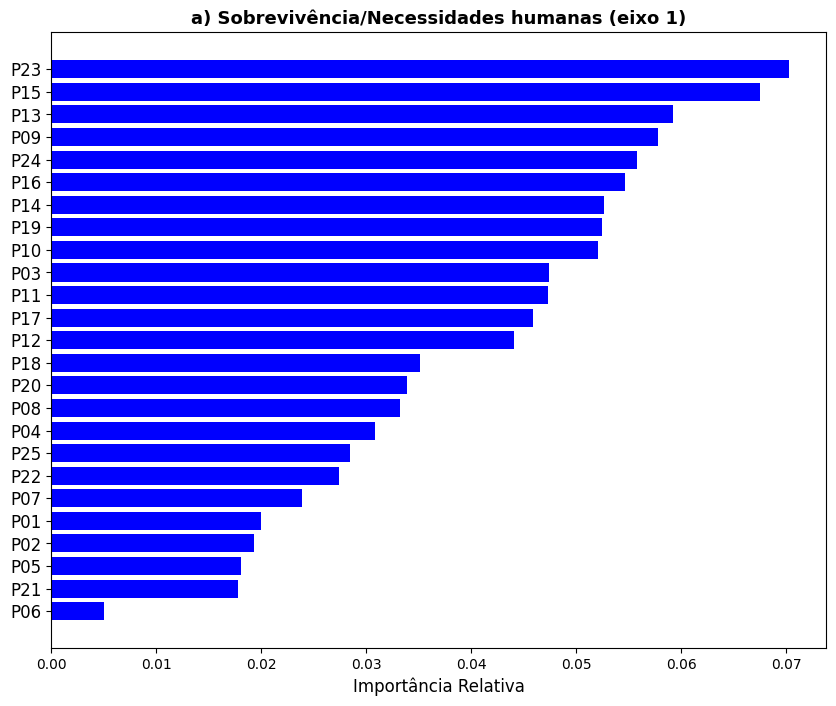

In [ ]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
labels = X.columns[indices]

# Criar o gráfico
plt.figure(figsize=(10, 8))
plt.title('a) Sobrevivência/Necessidades humanas (eixo 1)', fontsize=13, fontweight='bold')
plt.barh(range(X.shape[1]), importances[indices], color='b', align='center')
plt.yticks(range(X.shape[1]), labels, fontsize=12)
plt.xlabel('Importância Relativa', fontsize=12)
plt.gca().invert_yaxis()
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('a) Sobrevivência/Necessidades humanas (eixo 1)', fontsize=13, fontweight='bold')
plt.barh(range(X.shape[1]), importances[indices], color='b', align='center')
plt.yticks(range(X.shape[1]), labels, fontsize=12)
plt.xlabel('Importância Relativa', fontsize=12)
plt.gca().invert_yaxis()
plt.show()

### Montando a árvores com as features filtradas

As 12, 11 ou 9 primeiras tiverem acurácia boa, mas com 11 features foi superior as demais

In [8]:
colunas = ['P17', 'P11', 'P03', 'P10', 'P19', 'P14', 'P16', 'P24', 'P09', 'P13', 'P15', 'P23', "perfil"]
eixo_1_ = eixo_1[colunas]
eixo_1_

P17  P11  P03  P10  P19  P14  P16  P24  P09  P13  P15  P23      perfil
0    2.0  4.0  5.0  4.0  2.0  4.0  3.0  3.0  2.0  4.0  3.0  3.0  quilombola
1    2.0  4.0  3.0  3.0  4.0  2.0  3.0  3.0  3.0  4.0  3.0  3.0  quilombola
2    3.0  3.0  5.0  3.0  5.0  1.0  4.0  3.0  2.0  3.0  3.0  5.0  quilombola
3    1.0  3.0  4.0  4.0  2.0  3.0  2.0  3.0  3.0  4.0  5.0  3.0  quilombola
4    1.0  3.0  3.0  4.0  3.0  3.0  3.0  3.0  3.0  3.0  4.0  3.0  quilombola
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...         ...
165  2.0  3.0  5.0  5.0  1.0  5.0  3.0  3.0  5.0  4.0  1.0  3.0   fishermen
166  3.0  4.0  5.0  3.0  5.0  5.0  5.0  3.0  2.0  5.0  1.0  5.0   fishermen
167  1.0  5.0  5.0  5.0  5.0  5.0  5.0  3.0  2.0  5.0  5.0  3.0   fishermen
168  4.0  3.0  5.0  5.0  5.0  3.0  3.0  3.0  3.0  3.0  4.0  5.0   fishermen
169  1.0  3.0  5.0  5.0  5.0  5.0  3.0  5.0  2.0  5.0  5.0  3.0   fishermen

[170 rows x 13 columns]

In [9]:
eixo_1_ = eixo_1.drop(columns=["P06", "P05", "P02", "P07", "P01", "P21", "P22", "P04", "P08", "P25", "P20", "P18", "P12", "P17"])
eixo_1_

P03  P09  P10  P11  P13  P14  P15  P16  P19  P23  P24      perfil
0    5.0  2.0  4.0  4.0  4.0  4.0  3.0  3.0  2.0  3.0  3.0  quilombola
1    3.0  3.0  3.0  4.0  4.0  2.0  3.0  3.0  4.0  3.0  3.0  quilombola
2    5.0  2.0  3.0  3.0  3.0  1.0  3.0  4.0  5.0  5.0  3.0  quilombola
3    4.0  3.0  4.0  3.0  4.0  3.0  5.0  2.0  2.0  3.0  3.0  quilombola
4    3.0  3.0  4.0  3.0  3.0  3.0  4.0  3.0  3.0  3.0  3.0  quilombola
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...         ...
165  5.0  5.0  5.0  3.0  4.0  5.0  1.0  3.0  1.0  3.0  3.0   fishermen
166  5.0  2.0  3.0  4.0  5.0  5.0  1.0  5.0  5.0  5.0  3.0   fishermen
167  5.0  2.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  3.0  3.0   fishermen
168  5.0  3.0  5.0  3.0  3.0  3.0  4.0  3.0  5.0  5.0  3.0   fishermen
169  5.0  2.0  5.0  3.0  5.0  5.0  5.0  3.0  5.0  3.0  5.0   fishermen

[170 rows x 12 columns]

In [10]:
X_ = eixo_1_.drop("perfil", axis=1)
y_ = eixo_1_["perfil"]
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=42)

In [11]:
print("Características mais importantes:", X_.columns)

Características mais importantes: Index(['P03', 'P09', 'P10', 'P11', 'P13', 'P14', 'P15', 'P16', 'P19', 'P23',
       'P24'],
      dtype='object')


In [12]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 8, 10, 15, 20],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2', None]
}
clf = DecisionTreeClassifier(random_state=42)
#GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 8, 10, 15, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [13]:
print("Melhores parâmetros:", grid_search.best_params_)
best_clf = grid_search.best_estimator_

Melhores parâmetros: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


In [14]:
# Previsões do melhor modelo
y_pred = best_clf.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.7058823529411765
Relatório de Classificação:
                        precision    recall  f1-score   support

extractivists/farmers       0.67      0.57      0.62         7
            fishermen       1.00      0.86      0.92         7
           indigenous       0.67      1.00      0.80         4
           quilombola       0.78      0.58      0.67        12
                urban       0.43      0.75      0.55         4

             accuracy                           0.71        34
            macro avg       0.71      0.75      0.71        34
         weighted avg       0.75      0.71      0.71        34



In [15]:
best_clf.get_n_leaves()

np.int64(60)

In [16]:
best_clf.get_depth()

10

### Visualizando

In [17]:
column_names = X_.columns
target_names = eixo_1_['perfil'].unique()

In [18]:
print(target_names)

['quilombola' 'indigenous' 'fishermen' 'urban' 'extractivists/farmers']


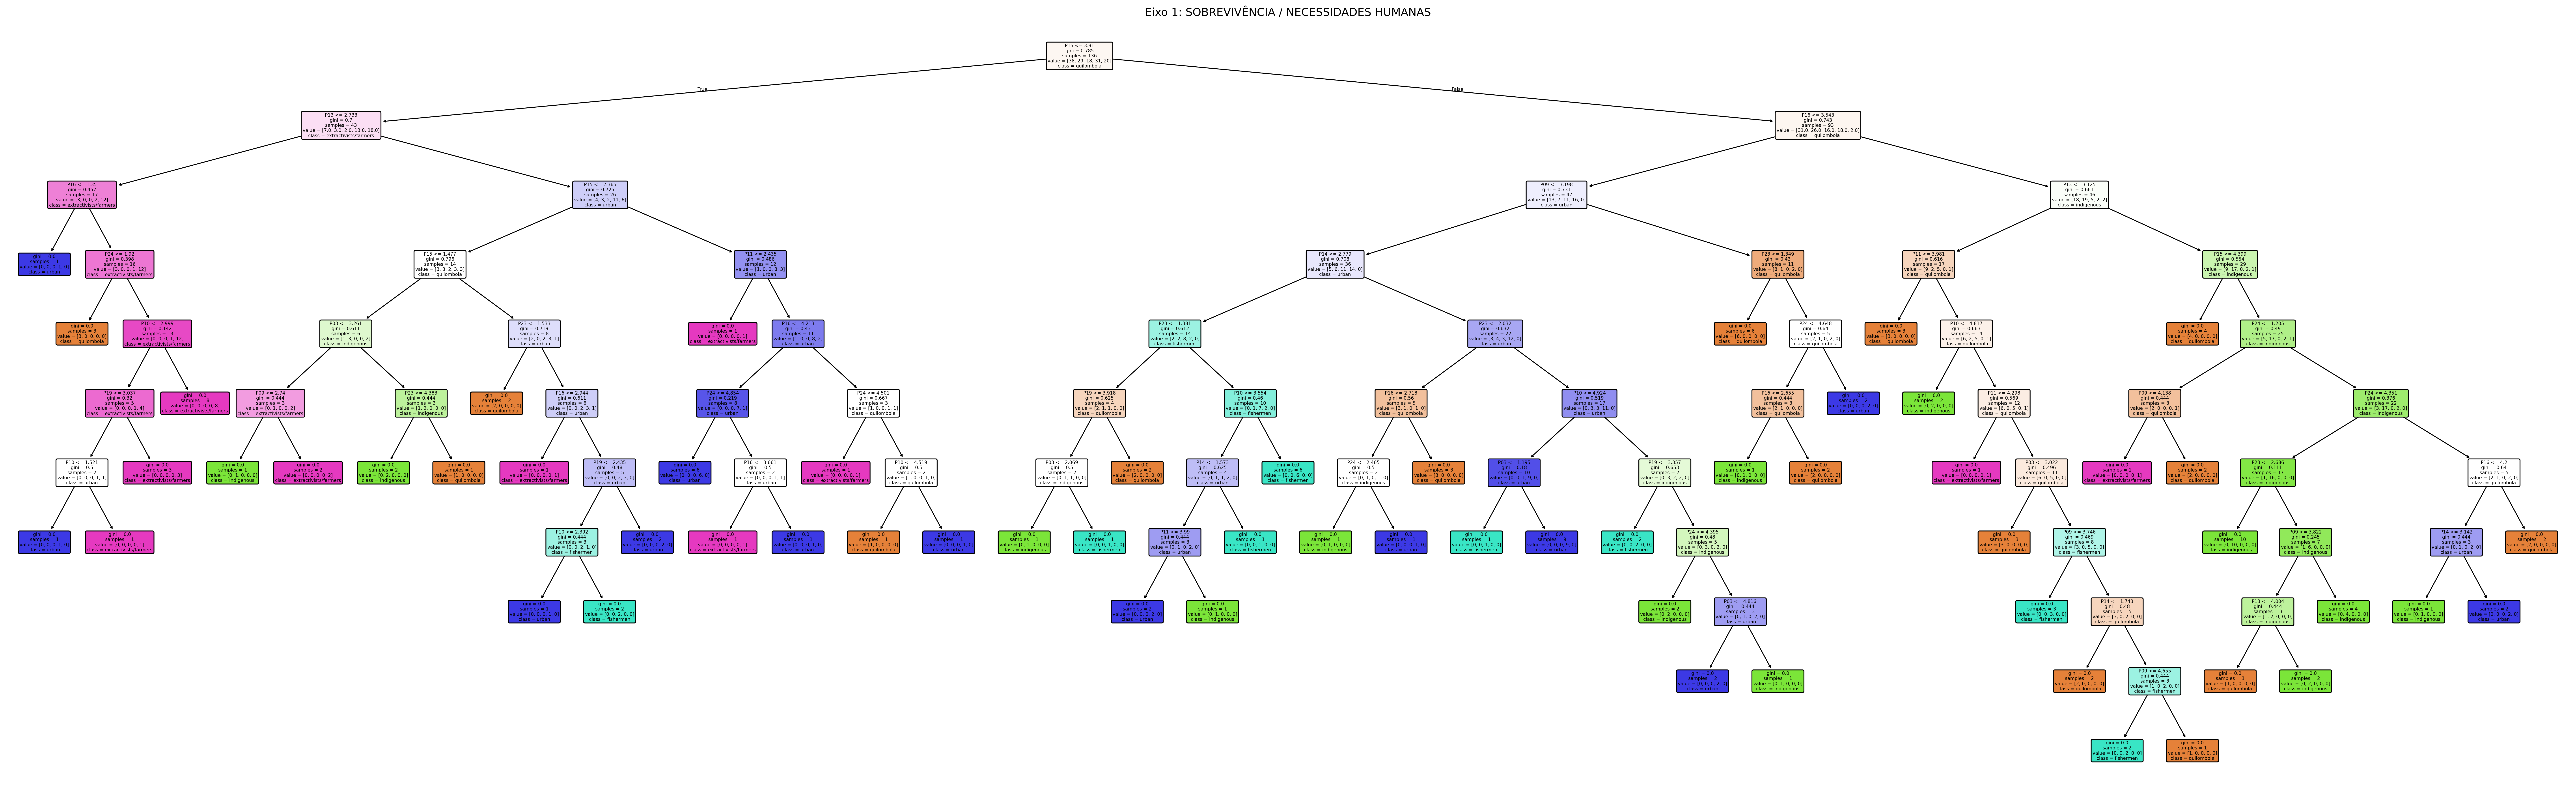

In [19]:
# Visualização da árvore (que você já fez)
plt.figure(figsize=(50, 15), dpi=300)
plot_tree(best_clf, feature_names=column_names,
                  class_names=target_names,
                  filled=True, rounded=True, fontsize=5)
plt.title("Eixo 1: SOBREVIVÊNCIA / NECESSIDADES HUMANAS")
plt.savefig("arvore_decisao_eixo1.png", format="png", bbox_inches='tight')
plt.show()

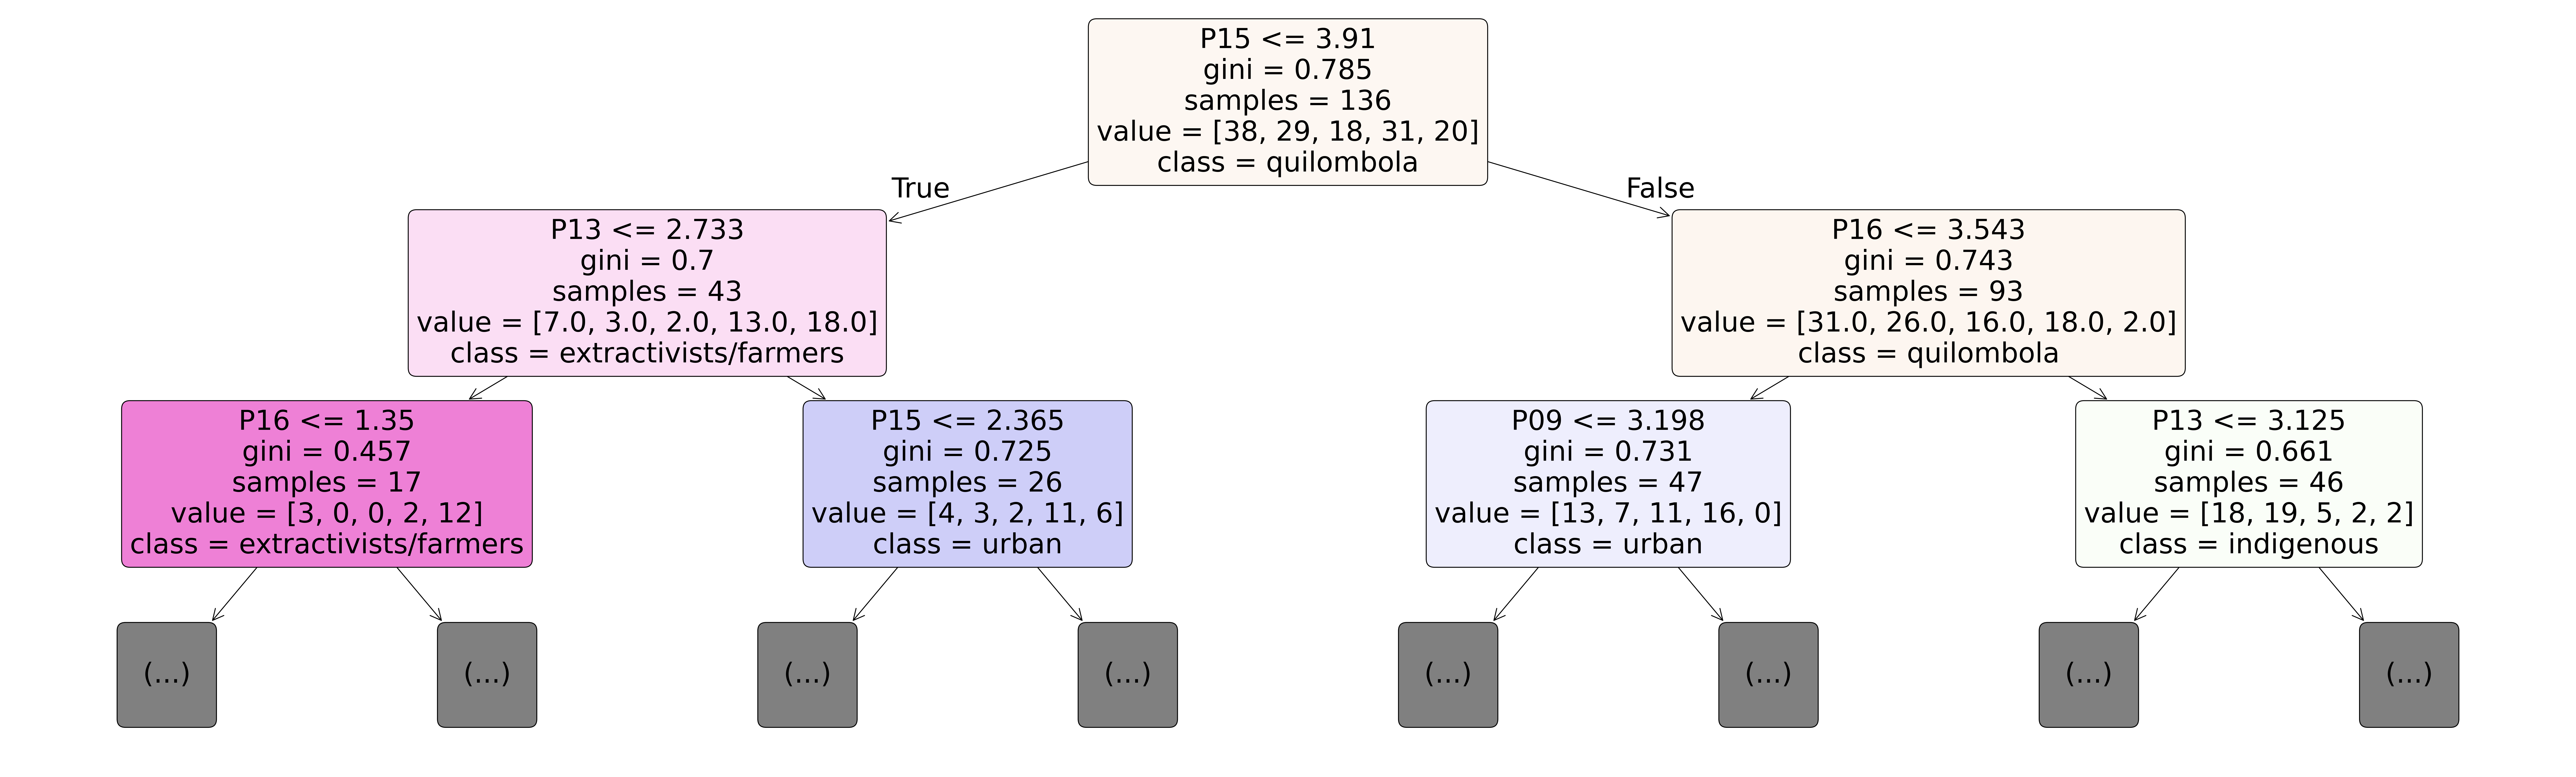

In [20]:
plt.figure(figsize=(50, 15), dpi=300)
plot_tree(best_clf, feature_names=column_names,
                  class_names=target_names,
                  max_depth=2,
                  filled=True, rounded=True, fontsize=30)
plt.savefig("arvore_decisao_eixo1.png", format="png", bbox_inches='tight')
plt.show()

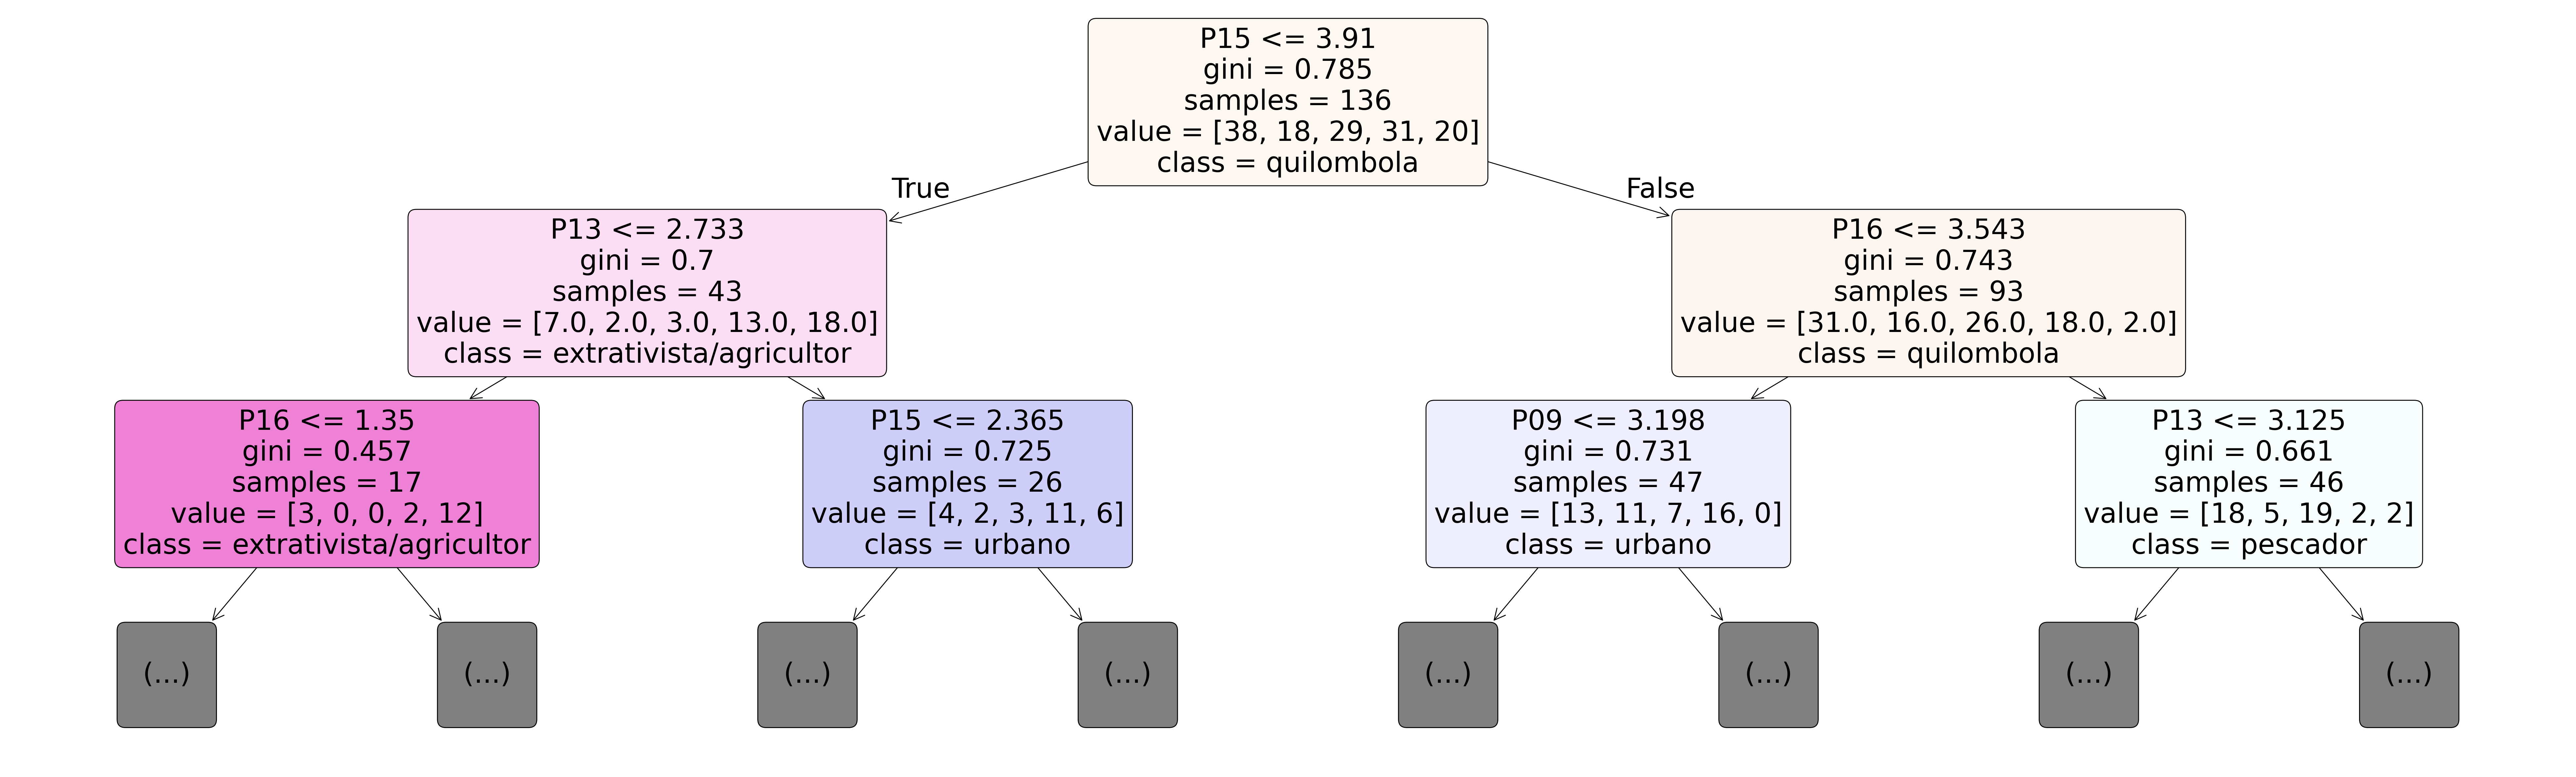

In [ ]:
plt.figure(figsize=(50, 15), dpi=300)
plot_tree(best_clf, feature_names=column_names,
                  class_names=target_names,
                  max_depth=2,
                  filled=True, rounded=True, fontsize=30)
plt.savefig("arvore_decisao_eixo1.png", format="png", bbox_inches='tight')
plt.show()

In [ ]:
from sklearn.tree import export_text

tree_text = export_text(best_clf, feature_names=column_names)
print(tree_text)

|--- P15 <= 3.91
|   |--- P13 <= 2.73
|   |   |--- P16 <= 1.35
|   |   |   |--- class: quilombola
|   |   |--- P16 >  1.35
|   |   |   |--- P24 <= 1.92
|   |   |   |   |--- class: extrativista/agricultor
|   |   |   |--- P24 >  1.92
|   |   |   |   |--- P10 <= 3.00
|   |   |   |   |   |--- P19 <= 3.04
|   |   |   |   |   |   |--- P10 <= 1.52
|   |   |   |   |   |   |   |--- class: quilombola
|   |   |   |   |   |   |--- P10 >  1.52
|   |   |   |   |   |   |   |--- class: urbano
|   |   |   |   |   |--- P19 >  3.04
|   |   |   |   |   |   |--- class: urbano
|   |   |   |   |--- P10 >  3.00
|   |   |   |   |   |--- class: urbano
|   |--- P13 >  2.73
|   |   |--- P15 <= 2.36
|   |   |   |--- P15 <= 1.48
|   |   |   |   |--- P03 <= 3.26
|   |   |   |   |   |--- P09 <= 2.74
|   |   |   |   |   |   |--- class: pescador
|   |   |   |   |   |--- P09 >  2.74
|   |   |   |   |   |   |--- class: urbano
|   |   |   |   |--- P03 >  3.26
|   |   |   |   |   |--- P23 <= 4.38
|   |   |   |   |   |   |